In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [55]:
# Load the data
train = pd.read_pickle("train/all_data_train.pkl")
test = pd.read_pickle("test/all_data_test.pkl")
valid = pd.read_pickle("valid/all_data_valid.pkl")

In [56]:
# Select only numeric columns for NaN and infinity handling
numeric_train = train.select_dtypes(include=[np.number])
numeric_test = test.select_dtypes(include=[np.number])
numeric_valid = valid.select_dtypes(include=[np.number])


# Replace infinite values with NaN
numeric_train.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_test.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_valid.replace([np.inf, -np.inf], np.nan, inplace=True)


# Fill NaN values with the column's mean
numeric_train.fillna(numeric_train.mean(), inplace=True)
numeric_test.fillna(numeric_test.mean(), inplace=True)
numeric_valid.fillna(numeric_valid.mean(), inplace=True)


# Update the original data with the cleaned numeric data
train[numeric_train.columns] = numeric_train
test[numeric_test.columns] = numeric_test
valid[numeric_valid.columns] = numeric_valid


# Split the data into features and labels
X_train = train.drop(columns=["class"])
y_train = train["class"]

X_test = test.drop(columns=["class"])
y_test = test["class"]

X_valid = valid.drop(columns=["class"])
y_valid = valid["class"]

In [117]:
# Create the model
model = KNeighborsClassifier()

# Define the hyperparameters
param_grid = {"n_neighbors": np.arange(1, 15)}

# Create the gridsearch
grid = GridSearchCV(model, param_grid, cv=5)

# Train the model
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

### Choice of Subsets for Cross-Validation

- A 7-fold cross-validation is chosen because it balances:

- Bias-variance tradeoff: More folds reduce bias but increase variance and computation time.
  Standard practice: 7-fold is commonly used and provides reliable results.


### Choice of k-Value Range

#### A range of k-values from 1 to 30 is chosen for the following reasons:

- Small k-values (e.g., 1-10) allow the model to be more sensitive to local patterns but may lead to overfitting.
- Larger k-values (e.g., 20-30) smooth the decision boundary and help avoid overfitting but could lead to underfitting if too large.
- Exploration: This range ensures a broad exploration of both small and large neighborhoods, helping to identify the best balance between bias and variance.


In [118]:
# Get the optimal hyperparameters
print("Optimal hyperparameters:", grid.best_params_)
print("Accuracy:", grid.best_score_)
# Get the accuracy for all k-values
results = grid.cv_results_
# get the accuracy for all k-values
results = grid.cv_results_
k_values = results["param_n_neighbors"].data
accuracies = results["mean_test_score"]

Optimal hyperparameters: {'n_neighbors': 9}
Accuracy: 0.8719080078158237


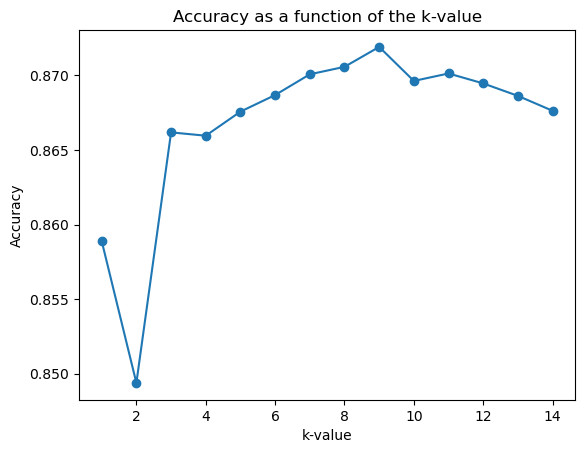

In [119]:
# Plot the accuracy as a function of the k-value. You need to extract that
# information from the model. How sensitive is the performance of the
# model for different k-values?

plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.title("Accuracy as a function of the k-value")
plt.show()

In [120]:
# validate the model
y_pred_valid = grid.predict(X_valid)

# Acquire the accuracy
accuracy = accuracy_score(y_valid, y_pred_valid)
print("Accuracy on the validation set:", accuracy)

Accuracy on the validation set: 0.9045712379045713


In [121]:
# test the model
y_pred_test = grid.predict(X_test)

# Acquire the accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.89449081803005


In [122]:
# Check the order of classes
class_order = sorted(y_train.unique())  # or use y_test.unique() or y_valid.unique()

print("Class order:", class_order)
# defund calss name
class_names = ["jump", "run", "spain", "walk"]

Class order: ['jump', 'run', 'spain', 'walk']


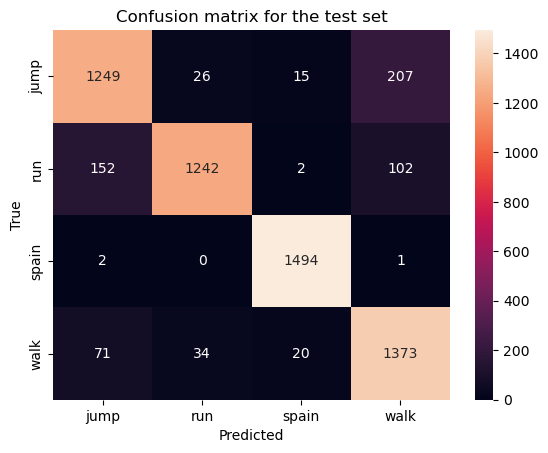

In [123]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix for the test set")
plt.show()

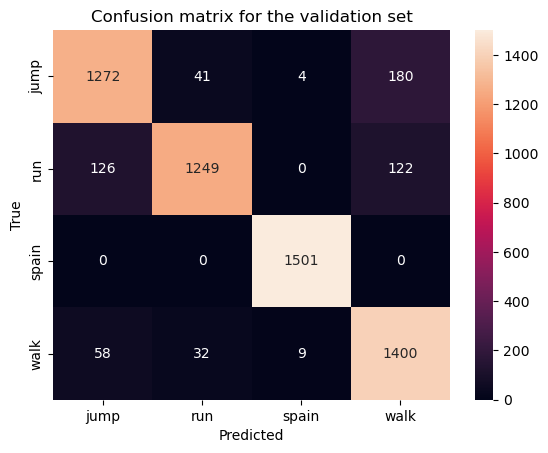

In [124]:
# Plot the confusion matrix
cm = confusion_matrix(y_valid, y_pred_valid)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix for the validation set")
plt.show()

## Differences in Confusion Matrices

### Validation Set vs. Test Set Accuracy:

#### The validation set accuracy is slightly higher due to its involvement in tuning the model's hyperparameters. The test set, not seen during training or validation, provides a real-world scenario, often revealing lower performance.

### Analysis of Confusion Matrices:

#### Validation Set:

Classes 0 and 1 show moderate misclassification, especially class 0 being predicted as class 3.
Class 2 has excellent recall with very few errors.
Class 3 has slight misclassifications mainly with class 0.

### Test Set:

Increased misclassifications between class 0 and 3 compared to the validation set, indicating potential overfitting issues.
Class 2 shows very high accuracy, similar to the validation set.
Class 1 has a noticeable number of false negatives.


In [125]:
# Normalize the data
scaler = StandardScaler()
X_train_N = scaler.fit_transform(X_train)
X_test_N = scaler.transform(X_test)
X_valid_N = scaler.transform(X_valid)

Optimal hyperparameters: {'n_neighbors': 7}
Accuracy: 0.8904846677114581


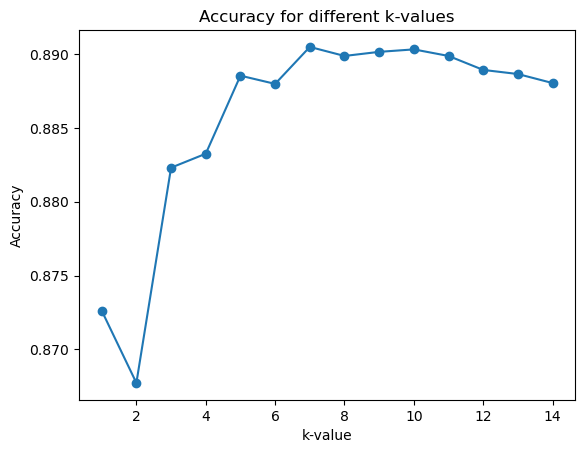

In [126]:
# # Train the model
grid.fit(X_train_N, y_train)

# # Get the optimal hyperparameters
print("Optimal hyperparameters:", grid.best_params_)
print("Accuracy:", grid.best_score_)

# Get the accuracy for all k-values
results = grid.cv_results_
k_values = results["param_n_neighbors"].data
accuracies = results["mean_test_score"]

# Plot the accuracy as a function of the k-value
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k-value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k-values")
plt.show()

Accuracy on the test set: 0.9078464106844741


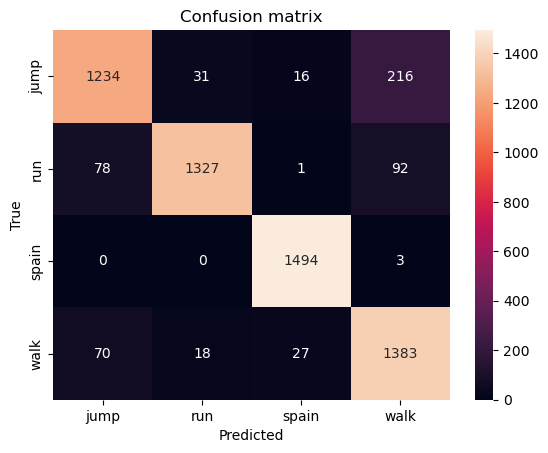

In [127]:
# test the model
y_pred = grid.predict(X_test_N)

# Acquire the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

Accuracy on the validation set: 0.9230897564230898


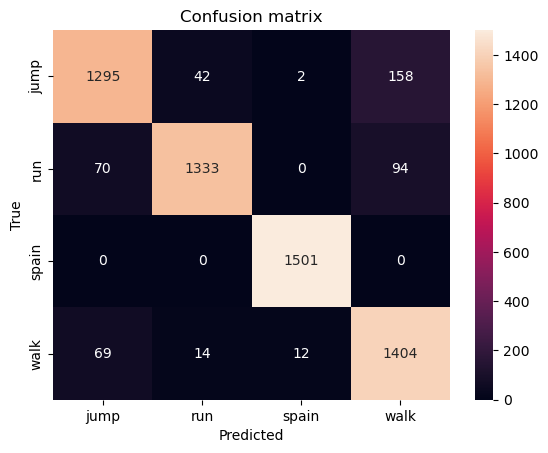

In [128]:
# validate the model
y_pred = grid.predict(X_valid_N)

# Acquire the accuracy
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy on the validation set:", accuracy)


# Plot the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.show()

## Explanation of Normalization for Decision Tree and KNN Classifiers:

## Is normalization needed for the Decision Tree classifier?

No, normalization is not needed for Decision Trees.

Why?: Decision Trees are scale-invariant, meaning they do not depend on the magnitude of the data. They split the data based on feature thresholds, so the actual numerical range of the features doesn't impact the performance. Decision Trees look at feature splits and their values independently, which makes normalization unnecessary.

Is normalization needed for the KNN classifier?

Yes, normalization is necessary for KNN.

Why?: KNN relies on the distance between data points (e.g., Euclidean distance). If the features are not normalized, features with larger numerical ranges will dominate the distance calculation, causing the model to be biased towards those features. Normalizing the data ensures that all features contribute equally to the distance calculation.
